### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.shape

(12684, 26)

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

    First, Eliminate duplicators 

    Second, Resolve structural errors (numerical, spelling etc.)

    Third, Filter outliers

    Fourth, Handle missing data

    Fifth, Review and Validate

In [5]:
# Check for duplicates
data[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [6]:
# It is possible that we can have duplicate data (I don't have an ID number to know if these are unique), since I don't
# have access to the team who collected this data to ask and becuase the number of rows duplicated are inconsequential 
# (74 out of 12684), I'll drop them to be safe
data=data.drop_duplicates()

In [7]:
#make sure duplicates have been removed
data.shape

(12610, 26)

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

#### Analysis
The car column has many null columns. I don't think it's enough data to make a strong suggestion about the relationship between that and the likeliness of coupon acceptance. I will drop this.

Bar, Coffee House, Carry Away, Restaurant < 20, 20< Restaurant <50 also have some null values. But they have enough to make a strong analysis.

For the other null values, we will drop if necessary later in the analysis


In [10]:
#Drop car column
if 'car' in data.columns:
    data=data.drop('car',1)
data

C:\Users\mohar\AppData\Local\Temp\ipykernel_7136\3579817253.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('car',1)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


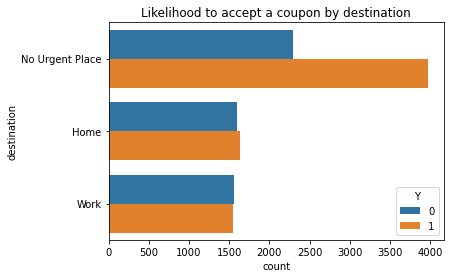

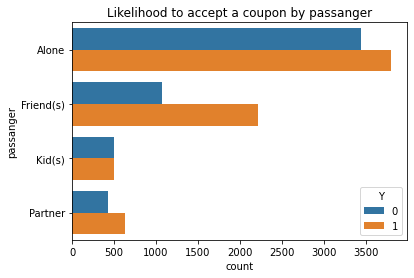

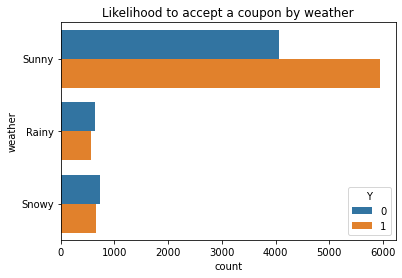

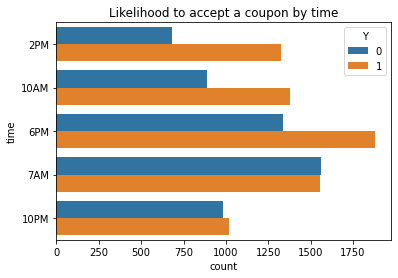

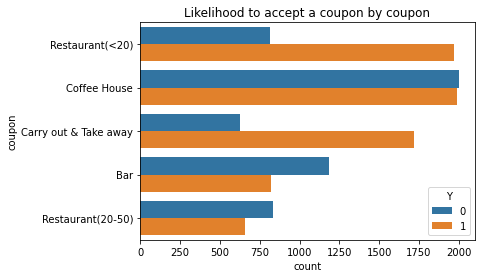

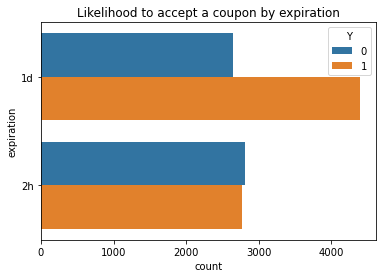

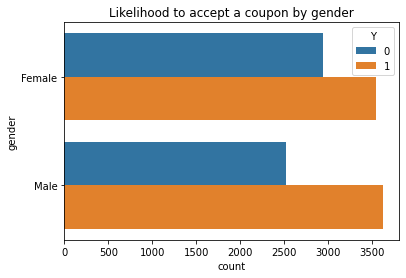

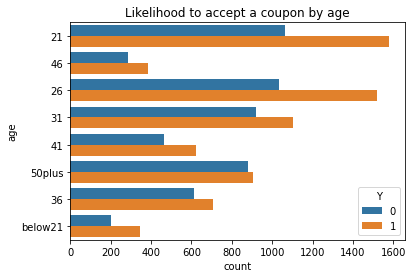

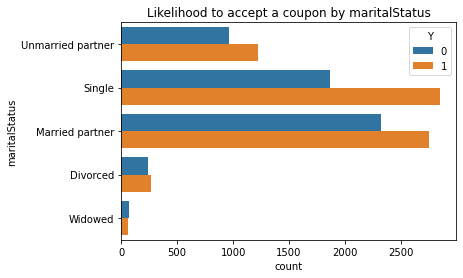

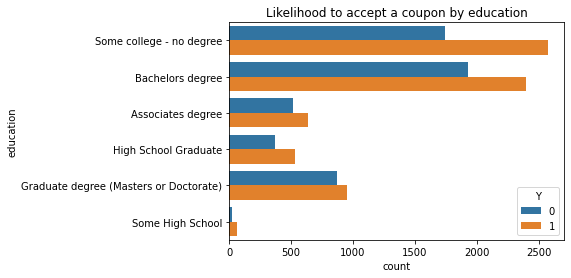

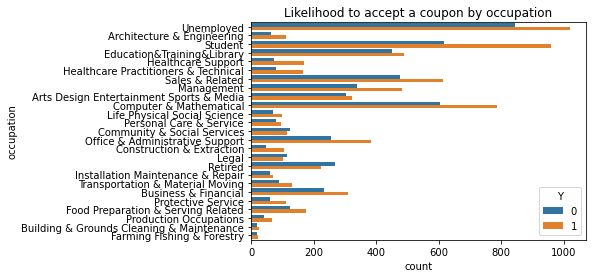

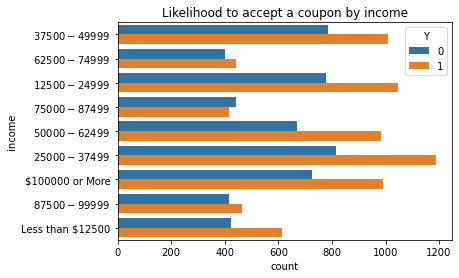

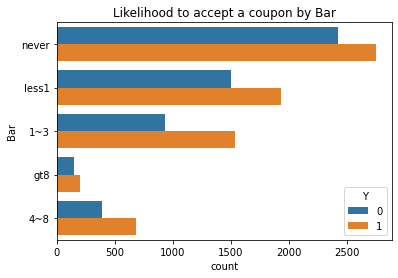

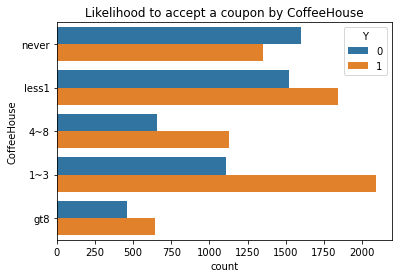

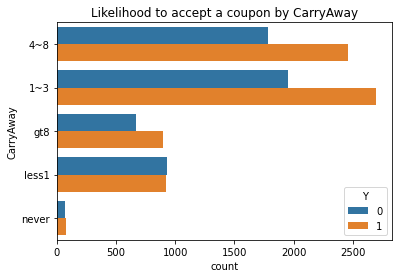

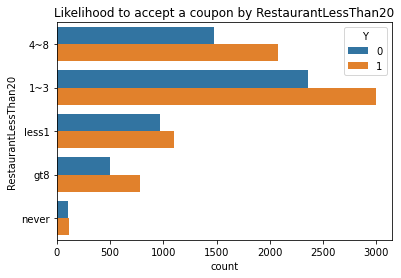

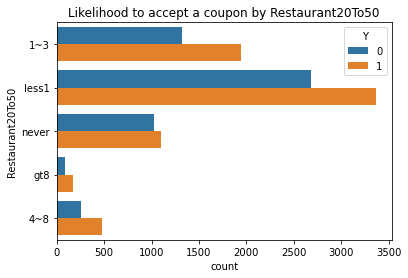

In [11]:
for col in data.select_dtypes(include='object').columns:
    plt.figure()
    sns.countplot(data=data, y=col, hue='Y').set_title('Likelihood to accept a coupon by ' + col)
#1 right away or later before the coupon expires
#0 no, I do not want the coupon

Destination: Interestingly, people with no urgent place to go are less likely to accept a coupon. While the other two are about equal

Passenger: people are much more likely to accept a coupon if they are with friends

Weather: passengers are significantly more likely to accept a coupon if the weather is sunnny

Time: passengers are more likely to accept a coupon between 10am-6pm (interesting as destination isn't as much of a factor with work)

Coupon type: people are much more likely to accept a coupon if it's a restaurant <20 or if it's carry out and take away
expiration: more likely to accept a coupon within 1 day instead of 2 hours

age: 21-31 are more likely to accept a coupon

marital status: single people are more likely to accept a coupon

education: some college/no degree and bachelors are more likely to accept a coupon


4. What proportion of the total observations chose to accept the coupon? 



In [12]:
accept_coupon=(data['Y'].sum()/data['Y'].count()) *100 
print("The proportion of people who accepted coupons {:.3}%".format(accept_coupon))


The proportion of people who accepted coupons 56.8%


5. Use a bar plot to visualize the `coupon` column.

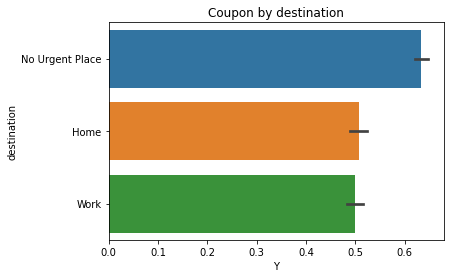

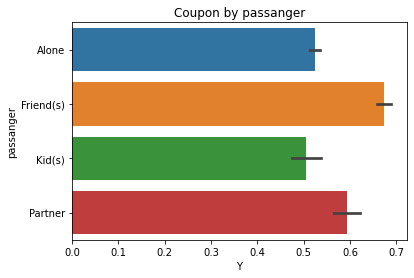

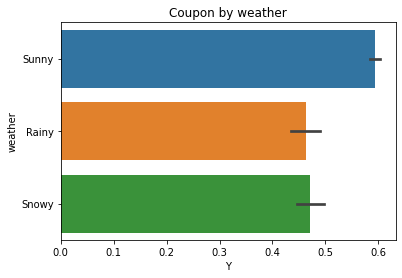

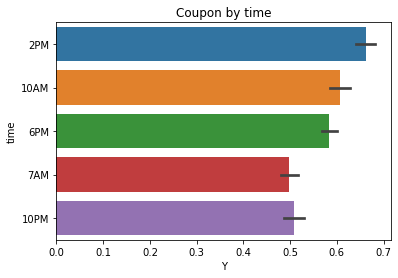

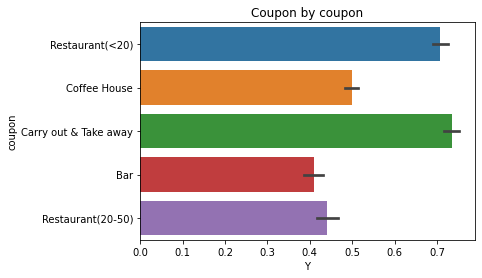

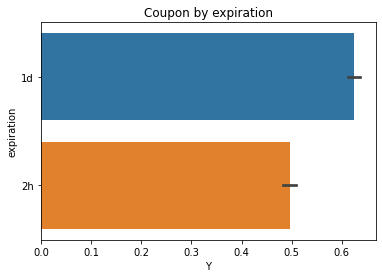

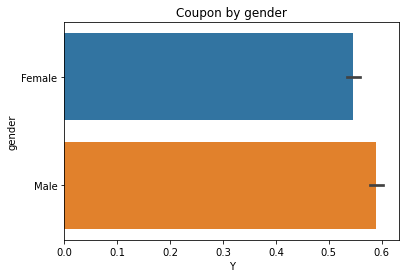

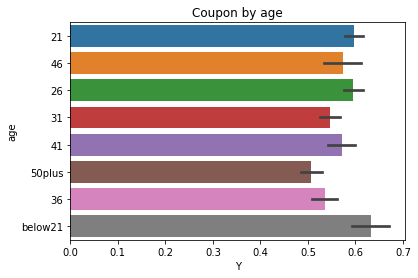

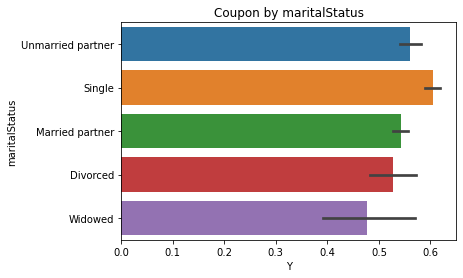

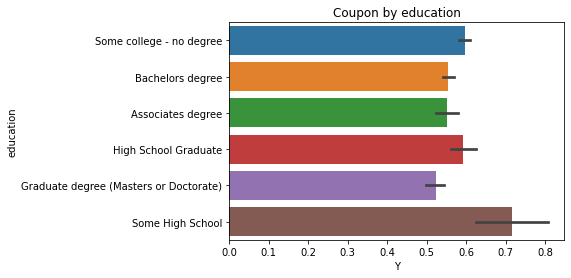

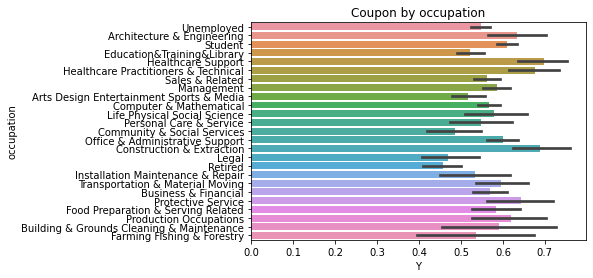

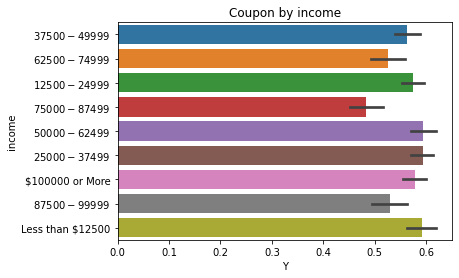

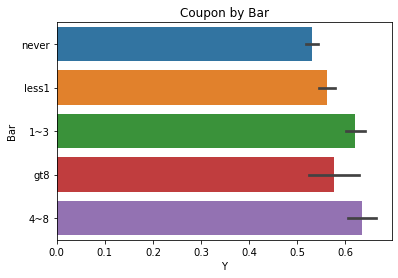

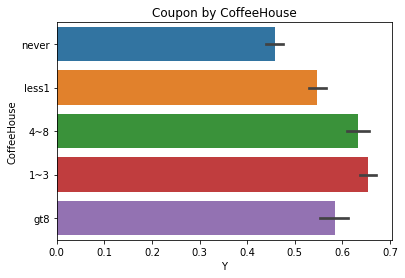

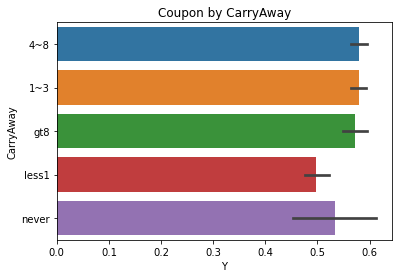

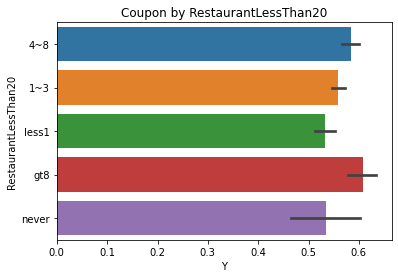

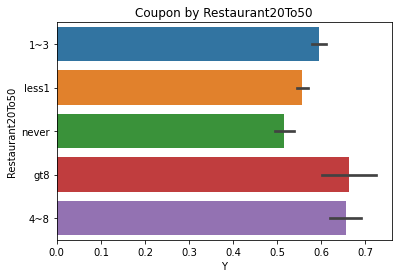

In [13]:
for col in data.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=data, y=col, x='Y').set_title('Coupon by ' + col)

Text(0.5, 1.0, 'Barplot of Coupon')

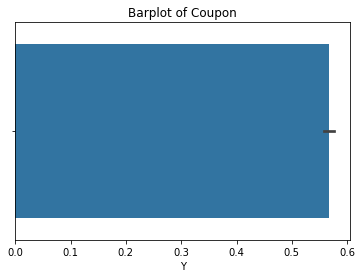

In [14]:
#bar plot of just coupon
sns.barplot(data=data,x='Y').set_title('Barplot of Coupon')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature ')

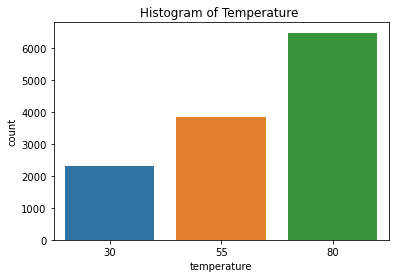

In [15]:
sns.countplot(data=data, x='temperature').set_title('Histogram of Temperature ')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
bar_coupons=data[data['coupon'].str.contains('Bar')]

2. What proportion of bar coupons were accepted?


In [17]:
accepted_bar=(bar_coupons['Y'].sum()/bar_coupons['Y'].count())*100
print("The proportion of people who accepted bar coupons {:.3}%".format(accepted_bar))

The proportion of people who accepted bar coupons 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
bar_coupons['Bar'].unique() #these are the possible values for bar

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [19]:
# Remove nan values
bar_coupons = bar_coupons.dropna(subset=['Bar'])

In [20]:
#Create dataframe for bars frequented less than 3 times a month and count the acceptance rate
bar_less3 = bar_coupons[(bar_coupons['Bar'] == 'never') | (bar_coupons['Bar'] == 'less1') | (bar_coupons['Bar'] == '1~3') ]
accept_less3= bar_less3[bar_less3['Y']== 1]['Y'].count()
#Create dataframe for bars frequented greater than 3 times a month and count the acceptance rate
bar_gr3 = bar_coupons[ (bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8')]
accept_gr3= bar_gr3[bar_gr3['Y']== 1]['Y'].count()

In [21]:
print(" The acceptance rate is %.0f%% for those who went to a bar 3 times or less and is %.0f%% for those who went more." 
      %(((accept_less3/bar_less3.shape[0])*100) , ((accept_gr3/bar_gr3.shape[0])*100) ))

 The acceptance rate is 37% for those who went to a bar 3 times or less and is 77% for those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
bar_gr_month=bar_coupons[((bar_coupons['Bar'] == '1~3') | (bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8')) ]
gr_month_25= bar_gr_month[bar_gr_month['age']> '25']
accept_gr_month_age25=gr_month_25[gr_month_25['Y']==1]

print(" The acceptance rate is %.0f%% for those who went to the bar more than once a month and are over the age of 25." 
      %(((accept_gr_month_age25.count()[0]/gr_month_25.shape[0])*100)))


 The acceptance rate is 69% for those who went to the bar more than once a month and are over the age of 25.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [23]:
bar_gr_month['passanger'].unique()
bar_gr_month['occupation'].unique()

array(['Student', 'Healthcare Support', 'Management', 'Unemployed',
       'Sales & Related', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal',
       'Life Physical Social Science', 'Retired',
       'Computer & Mathematical', 'Healthcare Practitioners & Technical',
       'Personal Care & Service', 'Architecture & Engineering',
       'Arts Design Entertainment Sports & Media', 'Protective Service',
       'Business & Financial', 'Food Preparation & Serving Related',
       'Installation Maintenance & Repair', 'Education&Training&Library',
       'Community & Social Services', 'Production Occupations',
       'Transportation & Material Moving',
       'Building & Grounds Cleaning & Maintenance'], dtype=object)

In [24]:
ques5=bar_gr_month[(bar_gr_month['passanger'] != 'Kid(s)') & (bar_gr_month['occupation'] != 'Life Physical Social Science')]
accept_ques5=ques5[ques5['Y']==1].count()[0]

print(" The acceptance rate is %.0f%% for those who went to more than once a month, had passengers who are not kids, and had occupations other than farming fishing or forestry." 
      %(((accept_ques5/ques5.shape[0])*100)))

 The acceptance rate is 71% for those who went to more than once a month, had passengers who are not kids, and had occupations other than farming fishing or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [25]:
bar_gr_month['maritalStatus'].unique()

array(['Single', 'Unmarried partner', 'Married partner', 'Divorced'],
      dtype=object)

In [26]:
bar_gr_month['income'].unique()

array(['$12500 - $24999', '$50000 - $62499', '$37500 - $49999',
       '$87500 - $99999', 'Less than $12500', '$100000 or More',
       '$25000 - $37499', '$75000 - $87499', '$62500 - $74999'],
      dtype=object)

In [27]:
#bar_coupons= pd.to_numeric(bar_coupons["age"])
#ques6_allconditions= bar_coupons[(((bar_coupons['Bar'] == '1~3') | (bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8')) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Unmarried partner')) | (((bar_coupons['Bar'] == '1~3') | (bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8')) & bar_coupons['age'] < '30') | (((bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8')) & ((bar_coupons['income'] == '12500 - $24999') | (bar_coupons['income'] == '$37500 - $49999') | (bar_coupons['income'] == 'Less than $12500') | (bar_coupons['income'] == '$25000 - $37499')))]['Y'].count()

ques6_a= bar_coupons[((bar_coupons['Bar'] == '1~3') | (bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8')) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Unmarried partner') ]
accept_ques6a= ques6_a[ques6_a['Y']==1].count()[0]
ques6_b=bar_gr_month[bar_gr_month['age']< '30']
accept_ques6b= ques6_b[ques6_b['Y']==1].count()[0]
ques6_c= bar_coupons[((bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8')) & ((bar_coupons['income'] == '12500 - $24999') | (bar_coupons['income'] == '$37500 - $49999') | (bar_coupons['income'] == 'Less than $12500') | (bar_coupons['income'] == '$25000 - $37499'))]
accept_ques6c= ques6_c[ques6_c['Y']==1].count()[0]

#ques5=bar_gr_month[(bar_gr_month['passanger'] != 'Kid(s)') & (bar_gr_month['occupation'] != 'Life Physical Social Science')]['Y'].count()
print(" The acceptance rate is %.0f%% for part a, %.0f%% for part b and %.0f%% for part c." 
      %(((accept_ques6a/ques6_a.shape[0])*100), ((accept_ques6b/ques6_b.shape[0])*100), ((accept_ques6c/ques6_c.shape[0])*100)))


 The acceptance rate is 75% for part a, 73% for part b and 81% for part c.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

A person is more likely to accept a bar coupon the more they frequent a facility, see question 3 where a person is 77% likely to accept a coupon if they frequent a bar more than 4 times a month whereas 37% likely if they frequent a bar less than that. This is further proved by the next analysis in question 4, when we create an analysis for when a person visits a bar more than 1 time a month, the likelihood of bar coupon acceptance is reduced to 69%. Further, the proportion of coupon acceptance overall is 41%, so the more they frequent a location, the higher acceptance rate compared to the mean.

Based on question 6, we can see that the more a person frequents a place the higher the percentage of coupon acceptance. For example, part c (with 4 months or more frequency) has a higher coupon acceptance rate than part a and c (more than once a month frequency).

The acceptance rate is 71% for those who went to more than once a month, had passengers who are not kids, and had occupations other than farming fishing or forestry.

The acceptance rate is 75% for people who go to bars more than once a month, had passengers that were not a kid, and were not widowed, 73% for people who go to bars more than once a month and are under the age of 30 and 81% for people who go to cheap restaurants more than 4 times a month and income is less than 50K.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [69]:
data['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [71]:
sunny = data[(data['weather'] == 'Sunny') ]
accept_sunny= sunny[sunny['Y']== 1]['Y'].count()

rainy = data[(data['weather'] == 'Rainy') ]
accept_rainy= rainy[rainy['Y']== 1]['Y'].count()

snowy = data[(data['weather'] == 'Snowy') ]
accept_snowy= snowy[snowy['Y']== 1]['Y'].count()

print(" The coupon acceptance rate is %.0f%% when the weather is sunny, %.0f%% when it's rainy and %.0f%% when it's snowy. " %(((accept_sunny/sunny.shape[0])*100), ((accept_rainy/rainy.shape[0])*100),((accept_snowy/snowy.shape[0])*100))) 

 The coupon acceptance rate is 59% when the weather is sunny, 46% when it's rainy and 47% when it's snowy. 


A general observation we can make here is that when the weather is better, a driver is more likely to accept a coupon.

Personally, I visit coffee shops more than 3 times a month (sometimes 3 times a week..). I was curious to see how that would affect coupon acceptance rates.

In [76]:
data['CoffeeHouse'].unique()
data['coupon'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [77]:
#Create a data frame for coffee shop coupon acceptance
coffee_coupons=data[data['coupon'].str.contains('Coffee House')]
# Remove nan values
coffee_coupons = coffee_coupons.dropna(subset=['CoffeeHouse'])

In [97]:
accept_coffee=((coffee_coupons[coffee_coupons['Y']==1]['Y'].count())/ coffee_coupons.shape[0])*100
print("The acceptance rate for drivers who accept coupons to the coffee house is about %.1f %%" %accept_coffee)

The acceptance rate for drivers who accept coupons to the coffee house is about 49.9 %


In [95]:
#Create dataframe for coffee houses frequented less than 3 times a month and count the acceptance rate
coffee_less3 = coffee_coupons[(coffee_coupons['CoffeeHouse'] == 'never') | (coffee_coupons['CoffeeHouse'] == 'less1') | (coffee_coupons['CoffeeHouse'] == '1~3') ]
accept_less3_coffee= coffee_less3[coffee_less3['Y']== 1]['Y'].count()
#Create dataframe for coffee houses frequented greater than 3 times a month and count the acceptance rate
coffee_gr3 = coffee_coupons[ (coffee_coupons['CoffeeHouse'] == '4~8') | (coffee_coupons['CoffeeHouse'] == 'gt8')]
accept_gr3_coffee= coffee_gr3[coffee_gr3['Y']== 1]['Y'].count()

print(" The acceptance rate is %.0f%% for those who went go to a coffee house 3 times or less a month and is %.0f%% for those who more often." 
      %(((accept_less3_coffee/coffee_less3.shape[0])*100) , ((accept_gr3_coffee/coffee_gr3.shape[0])*100) ))

 The acceptance rate is 45% for those who went go to a coffee house 3 times or less a month and is 68% for those who more often.


Would weather affect coffee house coupon acceptance?

In [96]:
#Create dataframe for coffee houses frequented less than 3 times a month and count the acceptance rate when weather is sunny
coffee_weather_less3=coffee_coupons[((coffee_coupons['CoffeeHouse'] == 'never') | (coffee_coupons['CoffeeHouse'] == 'less1') | (coffee_coupons['CoffeeHouse'] == '1~3')) & (coffee_coupons['weather'] == 'Sunny') ]
accept_coffee_weather_less=coffee_weather_less3[coffee_weather_less3['Y']== 1]['Y'].count()
#Create dataframe for coffee houses frequented greater than 3 times a month and count the acceptance rate when weather is sunny
coffee_weather_gr3=coffee_coupons[((coffee_coupons['CoffeeHouse'] == '4~8') | (coffee_coupons['CoffeeHouse'] == 'gt8')) & (coffee_coupons['weather'] == 'Sunny') ]
accept_coffee_weather_gr=coffee_weather_gr3[coffee_weather_gr3['Y']== 1]['Y'].count()

print(" The acceptance rate is %.0f%% for those who went to a coffee house 3 times or less while the weather was sunny and is %.0f%% for those who frequented the coffee house more than 3 times a month also while weather is sunny." 
      %(((accept_coffee_weather_less/coffee_weather_less3.shape[0])*100) , ((accept_coffee_weather_gr/coffee_weather_gr3.shape[0])*100) ))

 The acceptance rate is 45% for those who went to a coffee house 3 times or less while the weather was sunny and is 70% for those who frequented the coffee house more than 3 times a month also while weather is sunny.


The more a driver goes to a coffee house, the more a person is likely to accept it. However, we can very clearly see a lower acceptance rate compared to bar visitation. 

When the weather is sunny, the coupon acceptance rate for coffee shops is higher than the average if a person visits a coffee house more than 3 times a month; however, the weather does not affect the acceptance rate of those who visit 3 times or less (45%).

The coupon acceptance rate is 59% when the weather is sunny, 46% when it's rainy and 47% when it's snowy. 

The acceptance rate for drivers who accept coupons to the coffee house is about 49.9 %

The acceptance rate is 45% for those who went go to a coffee house 3 times or less a month and is 68% for those who more often.

The acceptance rate is 45% for those who went to a coffee house 3 times or less while the weather was sunny and is 70% for those who frequented the coffee house more than 3 times a month also while weather is sunny.

<Figure size 432x288 with 0 Axes>

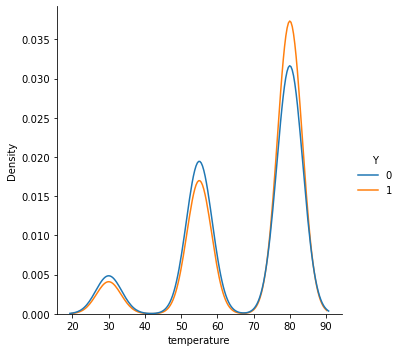

In [105]:
for col in ['temperature']:
    plt.figure()
    sns.displot(data=bar_coupons, x=col, hue='Y', kind='kde')

In [109]:
# look at acceptance, weather and passanger
coupon_acceptance = pd.crosstab(index=data["Y"], 
                             columns=[data["weather"],
                                      data["passanger"]],
                             margins=True)

# show percentages
coupon_acceptance*100/coupon_acceptance.loc["All",:]

weather         Rainy                                           Snowy  \
passanger       Alone   Friend(s)      Kid(s)     Partner       Alone   
Y                                                                       
0           56.574186   51.048951   46.052632   44.155844   59.050445   
1           43.425814   48.951049   53.947368   55.844156   40.949555   
All        100.000000  100.000000  100.000000  100.000000  100.000000   

weather                                         Sunny                          \
passanger   Friend(s)      Kid(s) Partner       Alone   Friend(s)      Kid(s)   
Y                                                                               
0           24.513619   76.923077   43.75   44.027367   32.503458   47.790698   
1           75.486381   23.076923   56.25   55.972633   67.496542   52.209302   
All        100.000000  100.000000  100.00  100.000000  100.000000  100.000000   

weather                       All  
passanger     Partner              
Y                                  
0           39.717979   43.243458  
1           60.282021   56.756542  
All        100.000000  100.000000